In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded=files.upload()


Saving vgogte.csv to vgogte.csv


In [ ]:
import io
file_name = "vgogte.csv"
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
print(df.head())

                         Name Platform Year_of_Release         Genre  \
0                'Wii Sports'      Wii            2006        Sports   
1         'Super Mario Bros.'      NES            1985      Platform   
2            'Mario Kart Wii'      Wii            2008        Racing   
3         'Wii Sports Resort'      Wii            2009        Sports   
4  'Pokemon Red/Pokemon Blue'       GB            1996  Role-Playing   

  Publisher NA_Sales EU_Sales  JP_Sales  Global_Sales  
0  Nintendo    41.36    28.96      3.77         82.53  
1  Nintendo    29.08     3.58      6.81         40.24  
2  Nintendo    15.68    12.76      3.79         35.52  
3  Nintendo    15.61    10.93      3.28         32.77  
4  Nintendo    11.27     8.89     10.22         31.37  


In [ ]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16612 entries, 0 to 16611
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16610 non-null  object 
 1   Platform         16611 non-null  object 
 2   Year_of_Release  16345 non-null  object 
 3   Genre            16610 non-null  object 
 4   Publisher        16559 non-null  object 
 5   NA_Sales         16587 non-null  object 
 6   EU_Sales         16586 non-null  object 
 7   JP_Sales         16596 non-null  float64
 8   Global_Sales     16596 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


,JP_Sales,Global_Sales
count,16596.000000,16596.000000
mean,0.077531,0.534790
std,0.305723,1.552465
min,0.000000,0.000000
25%,0.000000,0.060000
50%,0.000000,0.170000
75%,0.040000,0.470000
max,10.220000,82.530000


In [ ]:
df.isnull().sum()

Name                 2
Platform             1
Year_of_Release    267
Genre                2
Publisher           53
NA_Sales            25
EU_Sales            26
JP_Sales            16
Global_Sales        16
dtype: int64

In [ ]:
import pandas as pd



# Convert columns 'A' and 'B' to numeric, coercing errors to NaN
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'], errors='coerce')
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'], errors='coerce')

# Drop rows with NaN values (non-convertible strings)
df = df.dropna()

# Convert the columns to float
df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
# Check the data types after conversion
print(df.dtypes)
print(df)


Name                object
Platform            object
Year_of_Release     object
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Global_Sales       float64
dtype: object
                                  Name Platform Year_of_Release         Genre  \
0                         'Wii Sports'      Wii            2006        Sports   
1                  'Super Mario Bros.'      NES            1985      Platform   
2                     'Mario Kart Wii'      Wii            2008        Racing   
3                  'Wii Sports Resort'      Wii            2009        Sports   
4           'Pokemon Red/Pokemon Blue'       GB            1996  Role-Playing   
...                                ...      ...             ...           ...   
16607  'Samurai Warriors: Sanada Maru'      PS3            2016        Action   
16608               'LMA Manager 2007'     X360            2006        Sports   
16609        '

In [ ]:

df['Name'] = df['Name'].astype('str')
df['Platform'] = df['Platform'].astype('str')
df['Year_of_Release'] = df['Year_of_Release'].astype('str')
df['Genre'] = df['Genre'].astype('str')
df['Publisher'] = df['Publisher'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16216 entries, 0 to 16611
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16216 non-null  object 
 1   Platform         16216 non-null  object 
 2   Year_of_Release  16216 non-null  object 
 3   Genre            16216 non-null  object 
 4   Publisher        16216 non-null  object 
 5   NA_Sales         16216 non-null  float64
 6   EU_Sales         16216 non-null  float64
 7   JP_Sales         16216 non-null  float64
 8   Global_Sales     16216 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
df.replace('', np.nan, inplace=True)

# Function to replace missing values using z-score method
def replace_missing_with_zscore(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    missing_values = df[column].isnull()

    # Calculate z-scores for non-missing values
    z_scores = (df[column] - mean) / std_dev

    # Replace missing values with mean of non-missing values
    df.loc[missing_values, column] = mean

# Replace missing values in each column with z-score method
for column in df.columns:
    if df[column].dtype != 'object':  # Process only numerical columns
        replace_missing_with_zscore(df, column)
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Global_Sales       0
dtype: int64

In [ ]:
feature_names = df.columns
print ("feature names: ",feature_names)

feature names:  Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Global_Sales'],
      dtype='object')


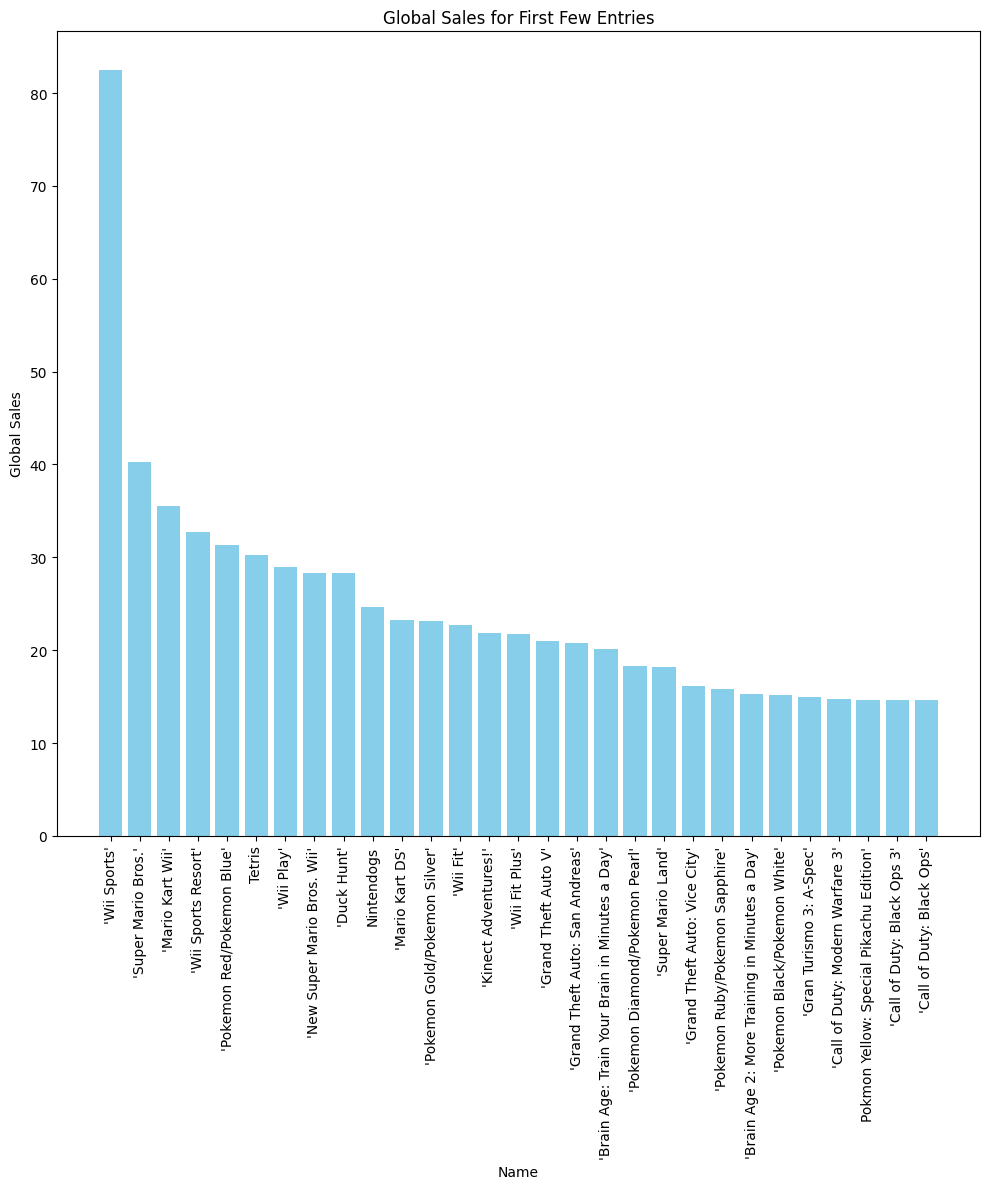

In [ ]:


# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Selecting the first few entries
num_entries_to_plot = 30
subset_df = df.head(num_entries_to_plot)

# Extracting the 'Names' and 'Global_sales' columns from the subset
names = subset_df['Name']
global_sales = subset_df['Global_Sales']

# Creating a bar plot
plt.figure(figsize=(10, 12))
plt.bar(names, global_sales, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Global Sales')
plt.title('Global Sales for First Few Entries')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()

plt.show()


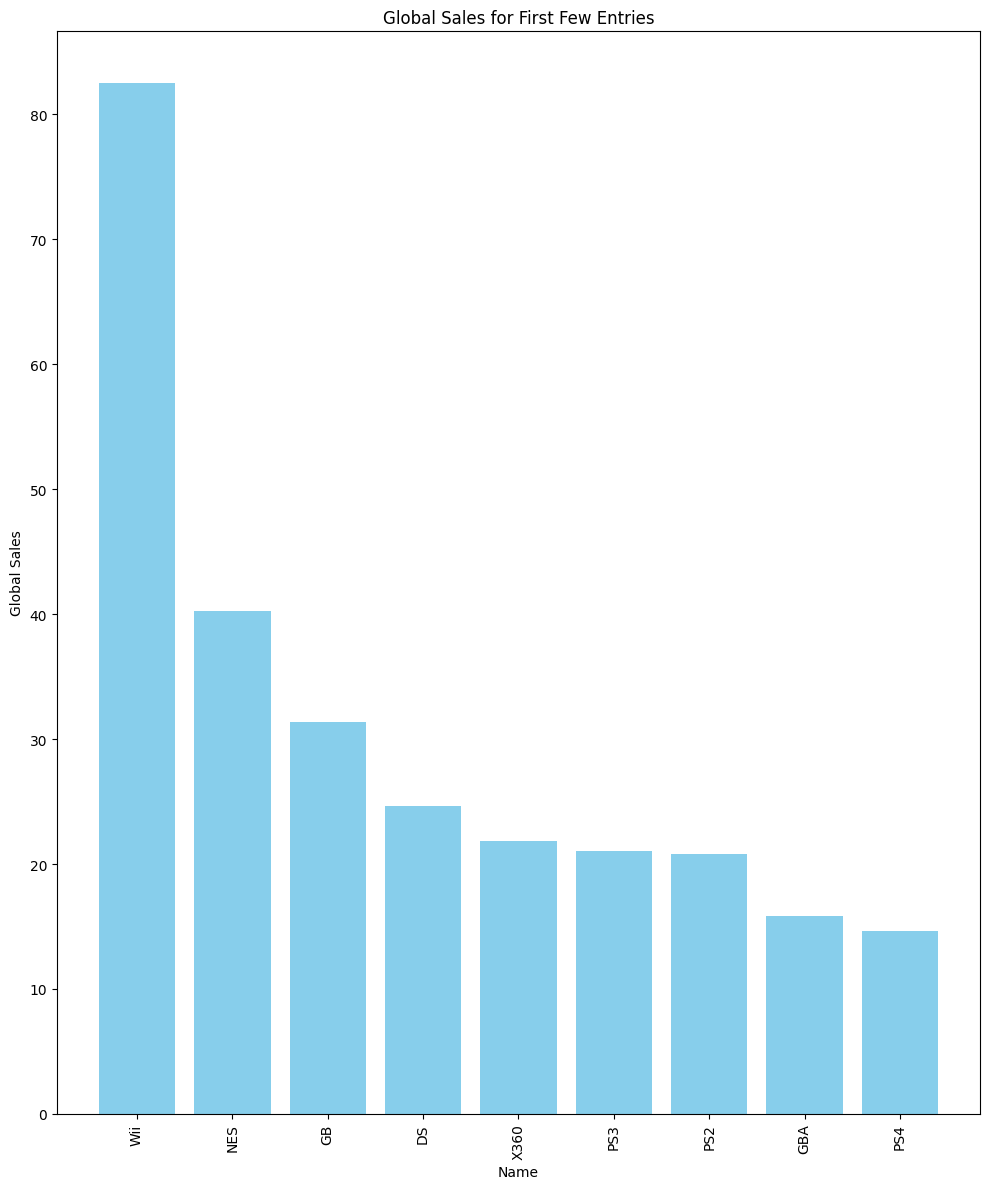

In [ ]:


# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Selecting the first few entries (let's say 10 entries)
num_entries_to_plot = 30
subset_df = df.head(num_entries_to_plot)

# Extracting the 'Names' and 'Global_sales' columns from the subset
names = subset_df['Platform']
global_sales = subset_df['Global_Sales']

# Creating a bar plot
plt.figure(figsize=(10, 12))
plt.bar(names, global_sales, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Global Sales')
plt.title('Global Sales for First Few Entries')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()

plt.show()


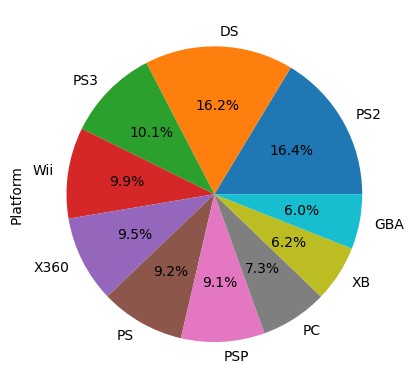

In [ ]:
# prompt: create a pie chart for top 10  "platform"

df.Platform.value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.show()


In [ ]:

# Calculate Q1 (25th percentile)
Q1 = df['NA_Sales'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = df['NA_Sales'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['NA_Sales'] < lower_bound) | (df['NA_Sales'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("Outliers:")
print(outliers)


Lower bound for outliers: -0.36
Upper bound for outliers: 0.6
Outliers:
                                     Name Platform Year_of_Release  \
0                            'Wii Sports'      Wii            2006   
1                     'Super Mario Bros.'      NES            1985   
2                        'Mario Kart Wii'      Wii            2008   
3                     'Wii Sports Resort'      Wii            2009   
4              'Pokemon Red/Pokemon Blue'       GB            1996   
...                                   ...      ...             ...   
2966                  'NBA Street Vol. 2'       XB            2003   
2970                 'NCAA Football 2005'       XB            2004   
2986  'Cars: Mater-National Championship'       DS            2007   
3015                 'Adventures of Tron'     2600            1981   
3061                    'Keystone Kapers'     2600            1982   

             Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
0           S

In [ ]:

# Calculate Q1 (25th percentile)
Q1 = df['EU_Sales'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = df['EU_Sales'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['EU_Sales'] < lower_bound) | (df['EU_Sales'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("Outliers:")
print(outliers)

Lower bound for outliers: -0.165
Upper bound for outliers: 0.275
Outliers:
                                              Name Platform Year_of_Release  \
0                                     'Wii Sports'      Wii            2006   
1                              'Super Mario Bros.'      NES            1985   
2                                 'Mario Kart Wii'      Wii            2008   
3                              'Wii Sports Resort'      Wii            2009   
4                       'Pokemon Red/Pokemon Blue'       GB            1996   
...                                            ...      ...             ...   
5483                       'We Sing Deutsche Hits'      Wii            2011   
5487                                'The X-Factor'      Wii            2010   
5568                       'Batman: Arkham Asylum'       PC            2009   
5726  'Gold\'s Gym: Cardio Workout (Others sales)'      Wii            2008   
5760                          'SingStar Take That'      

In [ ]:

# Calculate Q1 (25th percentile)
Q1 = df['JP_Sales'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = df['JP_Sales'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['JP_Sales'] < lower_bound) | (df['JP_Sales'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("Outliers:")
print(outliers)

Lower bound for outliers: -0.06
Upper bound for outliers: 0.1
Outliers:
                                                    Name Platform  \
0                                           'Wii Sports'      Wii   
1                                    'Super Mario Bros.'      NES   
2                                       'Mario Kart Wii'      Wii   
3                                    'Wii Sports Resort'      Wii   
4                             'Pokemon Red/Pokemon Blue'       GB   
...                                                  ...      ...   
10349  'Mobile Suit Gundam Age: Universe Accel / Cosm...      PSP   
10352         'Dragon Ball Z Super Gokuden: Kakusei-Hen'     SNES   
10353               'Busou Shinki: Battle Masters Mk. 2'      PSP   
10356                    'Fate/Extella: The Umbral Star'      PS4   
10357                       'Fairy Tail: Portable Guild'      PSP   

      Year_of_Release         Genre                       Publisher  NA_Sales  \
0                2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Encode categorical variables
label_encoder = LabelEncoder()
df['Platform'] = label_encoder.fit_transform(df['Platform'])

# Define features and target variable
features = ['Platform', 'EU_Sales', 'JP_Sales', 'NA_Sales']
target = 'Global_Sales'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Predict using the trained model
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
#Lower values of MSE indicate a better fit of the model to the data. A value of zero means the model perfectly predicts the data.
#

Mean Squared Error: 0.01
R-squared Score: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


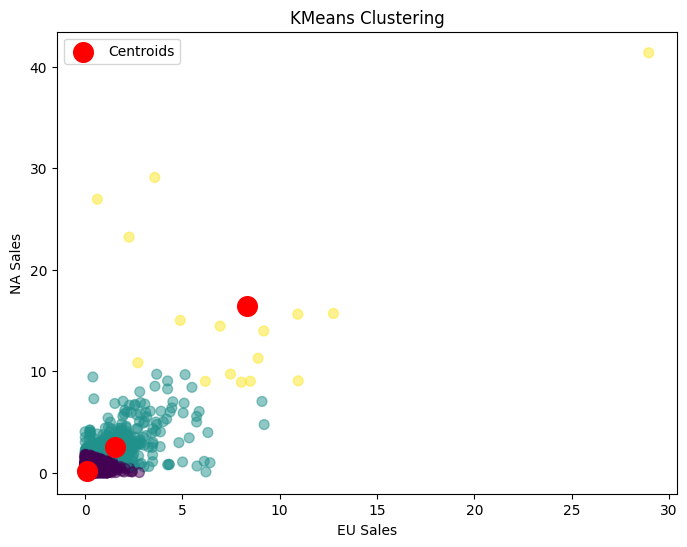

Cluster Centers:
Cluster 1: [0.08978427 0.06041869 0.16835206]
Cluster 2: [1.54281955 0.47464286 2.54898496]
Cluster 3: [ 8.303125  3.988125 16.440625]


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Considering 'EU_Sales', 'JP_Sales', 'NA_Sales' for clustering
features = ['EU_Sales', 'JP_Sales', 'NA_Sales']
X = df[features]

# Choosing the number of clusters
num_clusters = 3

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Getting cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Adding cluster labels to the dataset
df['Cluster'] = cluster_labels

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['EU_Sales'], X['NA_Sales'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='o', c='red', s=200, label='Centroids')
plt.xlabel('EU Sales')
plt.ylabel('NA Sales')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

# Print cluster centers
print("Cluster Centers:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")
